## Student Performance Analysis Notebook
# This notebook performs data cleaning, Exploratory Data Analysis (EDA), and builds Machine Learning models for regression (predict total_score) and classification (predict grade) based on the provided dataset.
# 
### 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

%matplotlib inline

### 2. Load the Data

In [8]:
df = pd.read_csv('/home/vyom/Documents/DS ML Datasets/student_performance.csv')
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


### 3. Data Cleaning
#### 3.1 Check for Missing Values

In [9]:
df.isnull().sum()

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

#### 3.2 Check for Duplicates

In [10]:
df.duplicated().sum()

# If duplicates exist, remove them
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

#### 3.3 Data Types and Info

In [11]:
df.info()

# Drop student_id as it's not useful for analysis
df = df.drop('student_id', axis=1)

# Convert categorical variables
df['grade'] = df['grade'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


### 4. Exploratory Data Analysis (EDA)
#### 4.1 Summary Statistics

In [12]:
df.describe()

,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,15.029127,84.711046,5.985203,84.283845
std,6.899431,9.424143,1.956421,15.432969
min,0.000000,50.000000,0.000000,9.400000
25%,10.300000,78.300000,4.700000,73.900000
50%,15.000000,85.000000,6.000000,87.500000
75%,19.700000,91.800000,7.300000,100.000000
max,40.000000,100.000000,10.000000,100.000000


#### 4.2 Distribution of Numerical Features

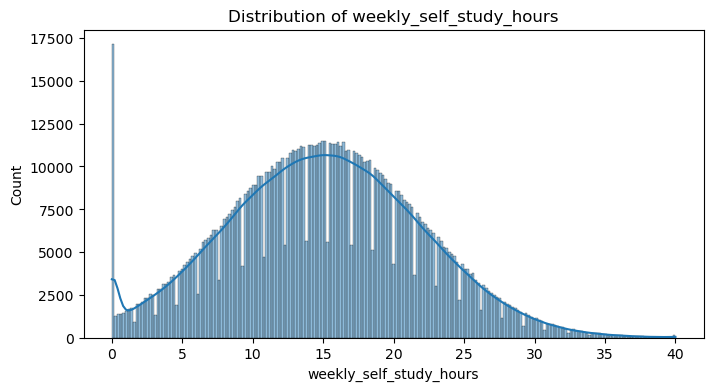

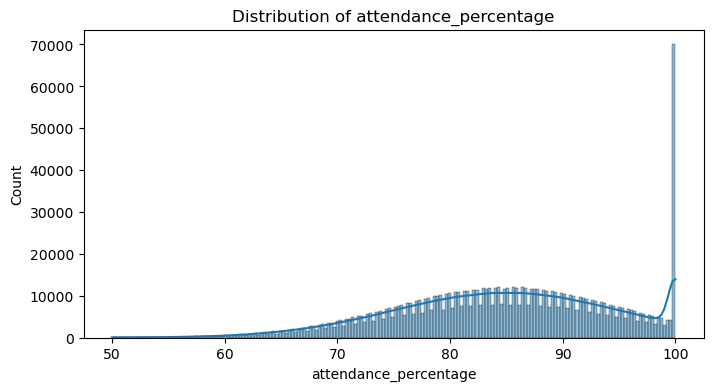

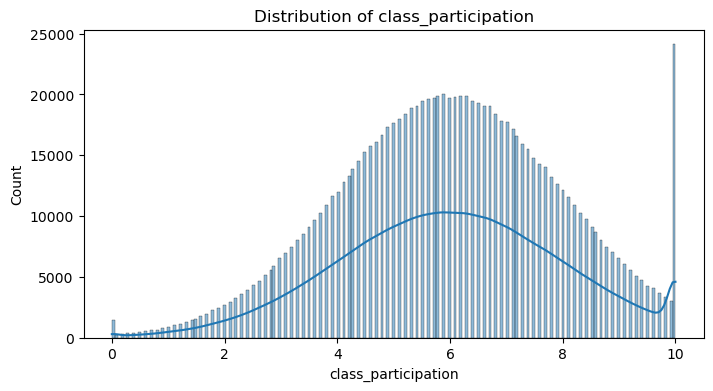

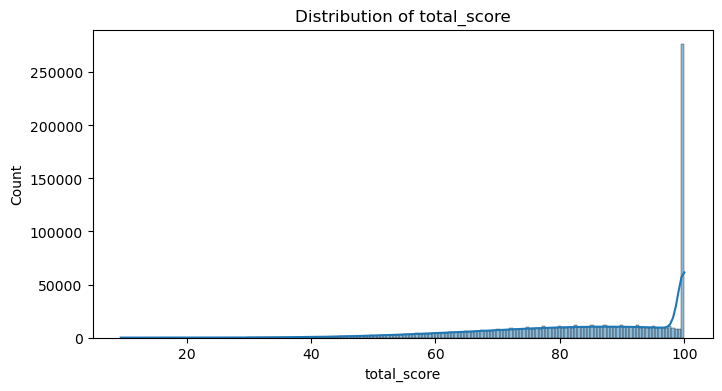

In [13]:
numerical_cols = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'total_score']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### 4.3 Boxplots for Outliers and Relationships

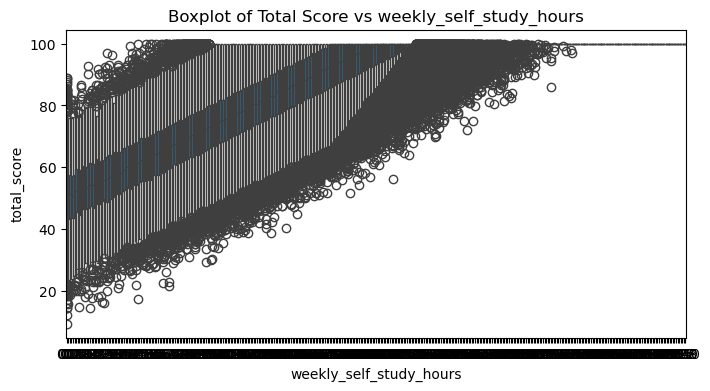

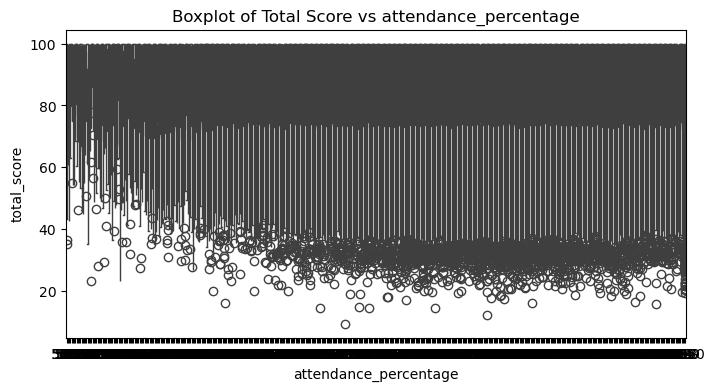

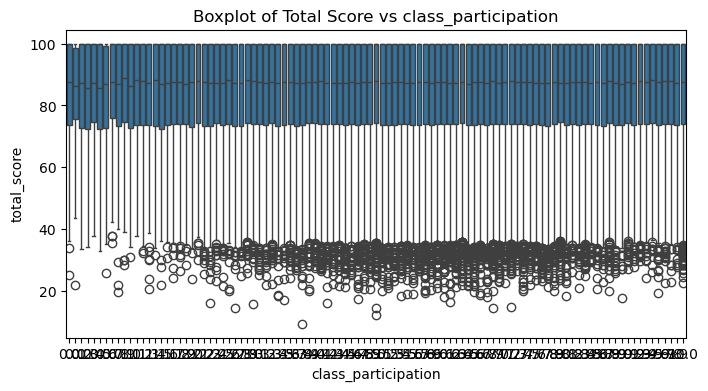

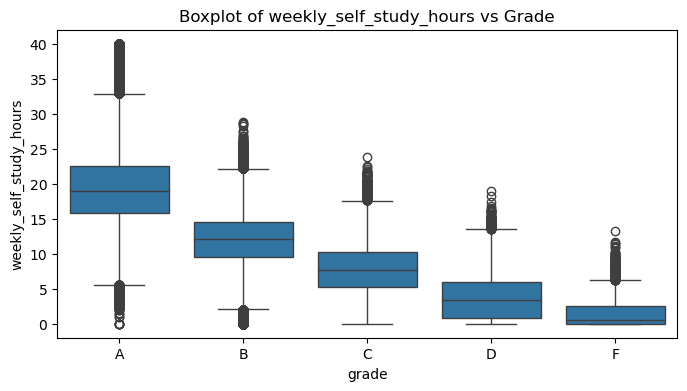

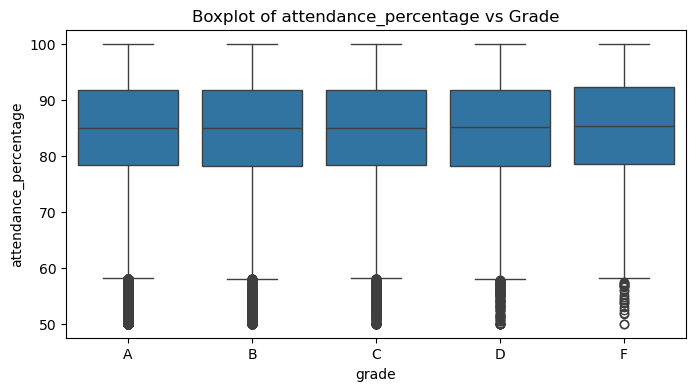

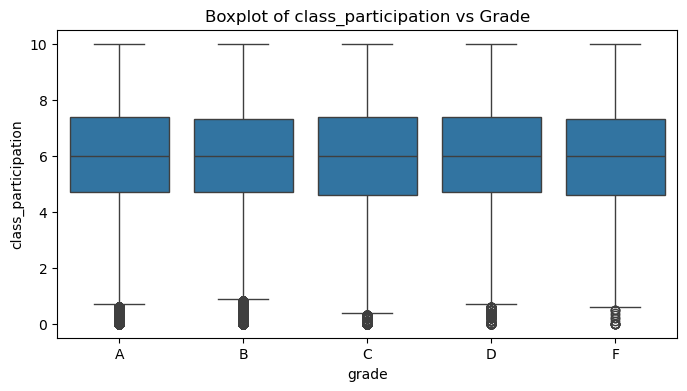

In [14]:
for col in numerical_cols:
    if col != 'total_score':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], y=df['total_score'])
        plt.title(f'Boxplot of Total Score vs {col}')
        plt.show()

# Grade vs Numerical
for col in numerical_cols[:-1]:  # Exclude total_score
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['grade'], y=df[col])
    plt.title(f'Boxplot of {col} vs Grade')
    plt.show()

#### 4.4 Correlation Matrix

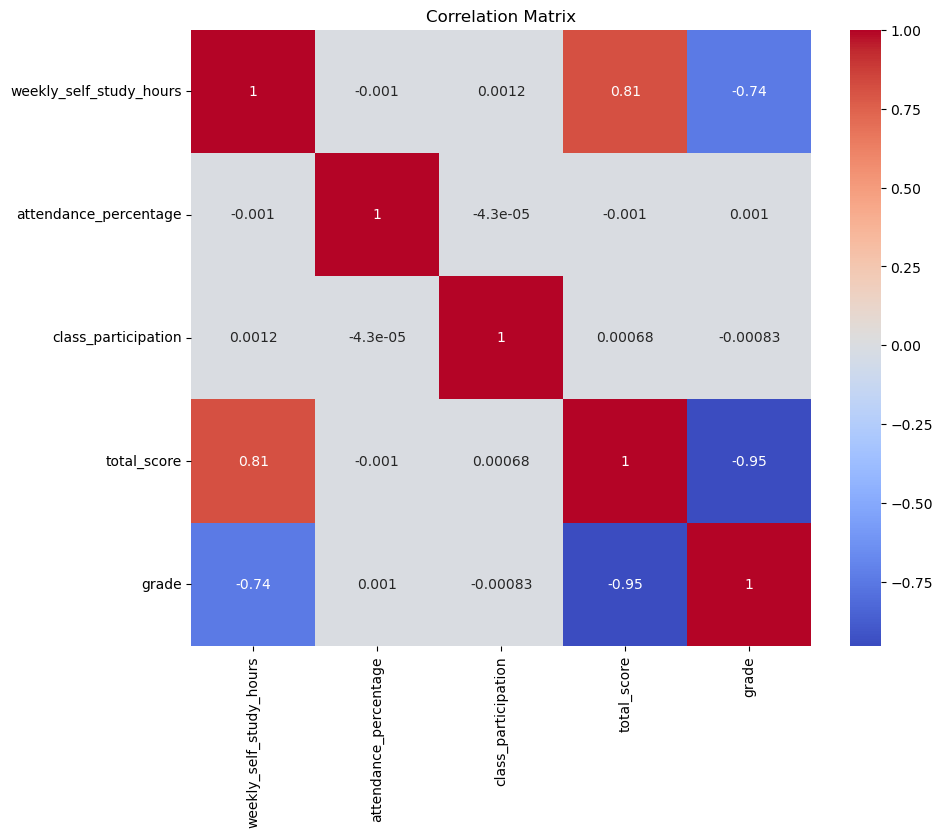

In [15]:
# Encode grade for correlation
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['grade'] = le.fit_transform(df_encoded['grade'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 5. Machine Learning Models
# We'll build models for regression (predict total_score) and classification (predict grade).
# 
#### 5.1 Regression: Predict total_score

In [16]:
# Features and target
X_reg = df.drop(['total_score', 'grade'], axis=1)
y_reg = df['total_score']

# Scale features
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_lr = lr.predict(X_test_reg)

print('Linear Regression for total_score:')
print('RMSE:', np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)))
print('R2 Score:', r2_score(y_test_reg, y_pred_lr))

Linear Regression for total_score:
RMSE: 8.996400873369833
R2 Score: 0.6600425865640975


In [17]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_rf_reg = rf_reg.predict(X_test_reg)

print('Random Forest Regressor for total_score:')
print('RMSE:', np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)))
print('R2 Score:', r2_score(y_test_reg, y_pred_rf_reg))

Random Forest Regressor for total_score:
RMSE: 9.06395142238396
R2 Score: 0.6549181984063154


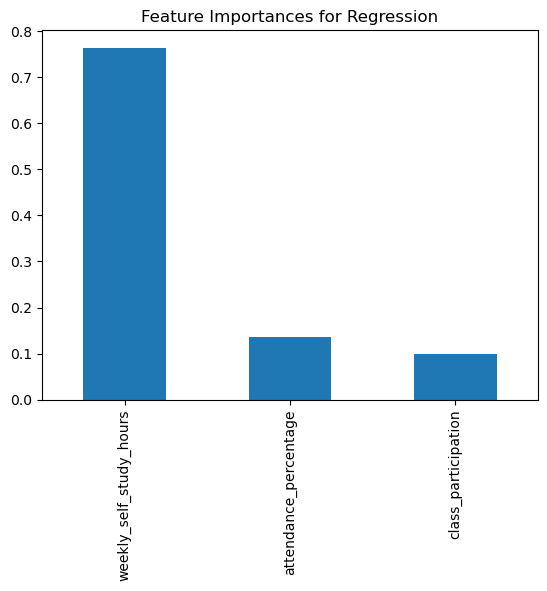

In [18]:
# Feature Importance (from Random Forest)
importances_reg = pd.Series(rf_reg.feature_importances_, index=X_reg.columns)
importances_reg.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for Regression')
plt.show()

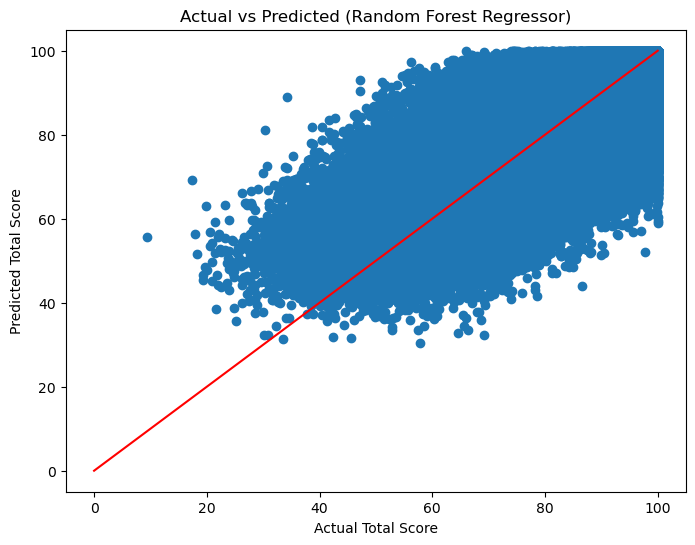

In [19]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf_reg)
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], color='red')
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Actual vs Predicted (Random Forest Regressor)')
plt.show()

#### 5.2 Classification: Predict grade

In [20]:
# Features and target
X_clf = df.drop(['total_score', 'grade'], axis=1)  # Note: In practice, avoid using total_score to predict grade since grade is derived from it. Here for demo.
y_clf = df['grade']

# Would have encoded target if it was needed, but since it's category, we'll use it as is for models

# Scale features
X_clf_scaled = scaler.fit_transform(X_clf)

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)

y_pred_log = log_reg.predict(X_test_clf)

print('Logistic Regression for grade:')
print('Accuracy:', accuracy_score(y_test_clf, y_pred_log))
print(classification_report(y_test_clf, y_pred_log))

Logistic Regression for grade:
Accuracy: 0.697005


/home/vyom/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.83      0.88      0.85    109888
           B       0.51      0.51      0.51     51556
           C       0.51      0.45      0.48     28380
           D       0.50      0.35      0.41      8927
           F       0.00      0.00      0.00      1249

    accuracy                           0.70    200000
   macro avg       0.47      0.44      0.45    200000
weighted avg       0.68      0.70      0.69    200000



/home/vyom/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vyom/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

y_pred_rf_clf = rf_clf.predict(X_test_clf)

print('Random Forest Classifier for grade:')
print('Accuracy:', accuracy_score(y_test_clf, y_pred_rf_clf))
print(classification_report(y_test_clf, y_pred_rf_clf))

Random Forest Classifier for grade:
Accuracy: 0.645
              precision    recall  f1-score   support

           A       0.81      0.84      0.82    109888
           B       0.45      0.43      0.44     51556
           C       0.42      0.41      0.41     28380
           D       0.37      0.32      0.34      8927
           F       0.13      0.07      0.09      1249

    accuracy                           0.65    200000
   macro avg       0.44      0.42      0.42    200000
weighted avg       0.64      0.65      0.64    200000



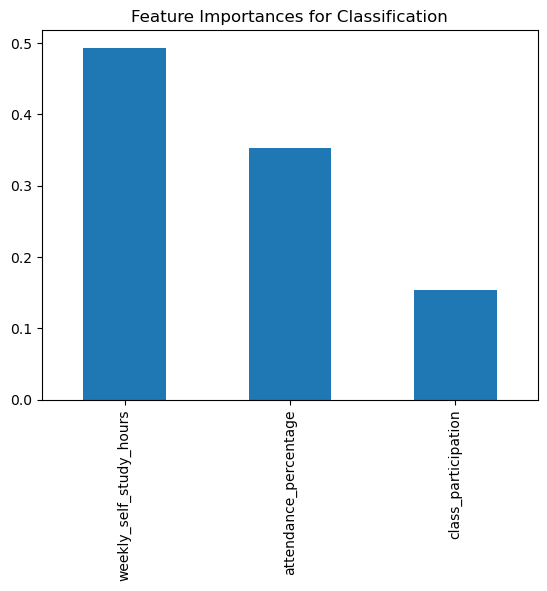

In [22]:
# Feature Importance (from Random Forest Classifier)
importances_clf = pd.Series(rf_clf.feature_importances_, index=X_clf.columns)
importances_clf.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for Classification')
plt.show()